In [18]:
import sympy
import numpy as np
import networkx as nx
import string
import pydotplus
import graphviz
import math
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from python_tsp.heuristics import solve_tsp_local_search
from python_tsp.heuristics import solve_tsp_simulated_annealing
from python_tsp.exact import solve_tsp_dynamic_programming
import time
from python_tsp.exact import solve_tsp_brute_force
import random
%matplotlib inline

## 각점 좌표

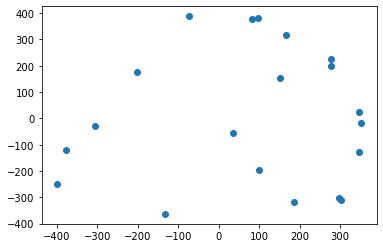

[[   0  187 -318]
 [   1   96  380]
 [   2 -133 -363]
 [   3 -400 -251]
 [   4  278  200]
 [   5   81  377]
 [   6  352  -18]
 [   7  -73  388]
 [   8 -378 -121]
 [   9  100 -198]
 [  10  347   23]
 [  11  151  152]
 [  12  298 -304]
 [  13 -203  176]
 [  14  166  316]
 [  15  346 -129]
 [  16  278  224]
 [  17  302 -310]
 [  18   34  -57]
 [  19 -305  -30]]


In [19]:
coordinates_arr = []
random.seed(6)
for i in range(20):
    arr = []
    arr.append(i)
    # 노드 번호 
    arr.append(random.randrange(-400,400))
    # x 좌표
    arr.append(random.randrange(-400,400))
    # y 좌표
    coordinates_arr.append(arr)
    
coordinates_arr = np.array(coordinates_arr)
coordinates_arr

plt.scatter(coordinates_arr[:,1],coordinates_arr[:,2])
plt.show()
print(coordinates_arr)

In [20]:
dist = []
for i in range(coordinates_arr.shape[0]):
    arr = []
    for j in range(coordinates_arr.shape[0]):
        if i >= j:
            arr.append(0)
        else:
            arr.append(math.dist(coordinates_arr[i,1:],coordinates_arr[j,1:]))
    dist.append(arr)
dist = np.array(dist,dtype = 'int')
print(dist)

[[  0 703 323 590 525 703 342 752 598 148 376 471 111 629 634 246 549 115
  302 570]
 [  0   0 777 802 255  15 473 169 689 578 436 234 713 361  94 567 239 720
  441 573]
 [  0   0   0 289 697 770 595 753 344 285 615 588 435 543 741 533 716 438
  348 374]
 [  0   0   0   0 814 791 787 717 131 502 795 682 700 470 801 755 827 704
  475 240]
 [  0   0   0   0   0 264 230 398 730 435 189 135 504 481 161 335  24 510
  354 626]
 [  0   0   0   0   0   0 479 154 677 575 442 235 714 347 104 571 249 721
  436 560]
 [  0   0   0   0   0   0   0 587 737 309  41 263 291 587 382 111 253 296
  320 657]
 [  0   0   0   0   0   0   0   0 593 611 556 325 785 248 249 665 387 792
  457 478]
 [  0   0   0   0   0   0   0   0   0 484 739 595 700 344 697 724 741 705
  416 116]
 [  0   0   0   0   0   0   0   0   0   0 331 353 224 481 518 255 458 230
  155 438]
 [  0   0   0   0   0   0   0   0   0   0   0 234 330 570 344 152 212 336
  323 654]
 [  0   0   0   0   0   0   0   0   0   0   0   0 479 354 164 342

## dp로 구한 정확한 해

In [23]:
before_time = time.time()
dp_kernel = solve_tsp_dynamic_programming(dist)
dp_distance = kernel[1]
dp_permutation = kernel[0]
after_time = time.time() 
print(f"distance : {dp_distance}")
print(f"dp_permutation : {dp_permutation}")
print('시간 :',after_time - before_time)

distance : 1035
dp_permutation : [0, 12, 6, 2, 18, 17, 8, 19, 13, 7, 4, 16, 15, 14, 11, 5, 3, 1, 10, 9]
시간 : 94.84026789665222


## sa로 구한것

In [30]:
before_time = time.time()
kernel = solve_tsp_simulated_annealing(dist)
sa_distance = kernel[1]
sa_permutation = kernel[0]
after_time = time.time() 

print(f"distance : {sa_distance}")
print(f"sa_permutation : {sa_permutation}")
print('시간: ',after_time - before_time)
print(f'오차 : {(sa_distance-dp_distance)/ dp_distance}')

distance : 1225
sa_permutation : [0, 18, 8, 6, 16, 15, 11, 9, 7, 4, 3, 19, 12, 10, 17, 13, 2, 1, 14, 5]
시간:  0.49768805503845215
오차 : 0.18357487922705315


## local search 로 구한것

In [34]:
before_time = time.time()
ls_permutation, ls_distance = solve_tsp_local_search(dist)
after_time = time.time()
print(f"distance : {ls_distance}")
print(f"ls_permutation : {ls_permutation}")
print('시간 :', after_time - before_time)
print(f'오차 : {(ls_distance-dp_distance)/ dp_distance }')

distance : 1122
ls_permutation : [0, 17, 11, 7, 4, 18, 13, 5, 1, 14, 16, 15, 9, 6, 10, 2, 19, 12, 8, 3]
시간 : 0.008656740188598633
오차 : 0.08405797101449275


## sa로구한 해의 그래프

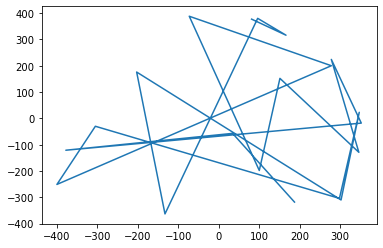

<Figure size 57600x43200 with 0 Axes>

In [37]:
sa_x_list = [];sa_y_list = []
for i in range(20):

    
    x = coordinates_arr[sa_permutation[i]][1]
    y = coordinates_arr[sa_permutation[i]][2]
    sa_x_list.append(x)
    sa_y_list.append(y)
    
plt.plot(sa_x_list,sa_y_list)
plt.figure(figsize=(800,600))
plt.show()


## ls로 구한 해의 그래프

[0, 17, 11, 7, 4, 18, 13, 5, 1, 14, 16, 15, 9, 6, 10, 2, 19, 12, 8, 3]


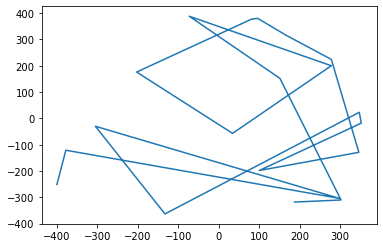

<Figure size 57600x43200 with 0 Axes>

In [38]:
ls_x_list = [];ls_y_list = []
print(ls_permutation)
for i in range(20):
    x = coordinates_arr[ls_permutation[i]][1]
    y = coordinates_arr[ls_permutation[i]][2]
    ls_x_list.append(x)
    ls_y_list.append(y)

plt.plot(ls_x_list,ls_y_list)
plt.figure(figsize=(800,600))
plt.show()

## dp로 구한 해의 그래프

[0, 18, 8, 6, 16, 15, 11, 9, 7, 4, 3, 19, 12, 10, 17, 13, 2, 1, 14, 5]


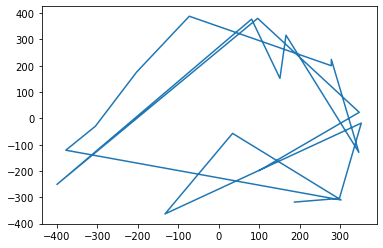

<Figure size 57600x43200 with 0 Axes>

In [39]:
dp_x_list = [];dp_y_list = []
print(kernel[0])
for i in range(20):
    x = coordinates_arr[dp_permutation[i]][1]
    y = coordinates_arr[dp_permutation[i]][2]
    dp_x_list.append(x)
    dp_y_list.append(y)

plt.plot(dp_x_list,dp_y_list)
plt.figure(figsize=(800,600))
plt.show()